In [ ]:
# The MNIST database (Modified National Institute of Standards and 
# Technology database) is a large database of handwritten digits that
# is commonly used for training various image processing systems

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import cv2 
from PIL import Image 
import tensorflow as tf 

tf.random.set_seed(3) 

from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix 

In [ ]:
# Load data - its already processed and splited 

In [2]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [3]:
type(X_train)

numpy.ndarray

In [4]:
print((X_train.shape, Y_train.shape, X_test.shape, Y_test.shape))

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))


In [ ]:
# Train data is 60,000 & Test data is 10,000 - All grayscale images of size 28x28

In [6]:
print(X_train[10].shape)

(28, 28)


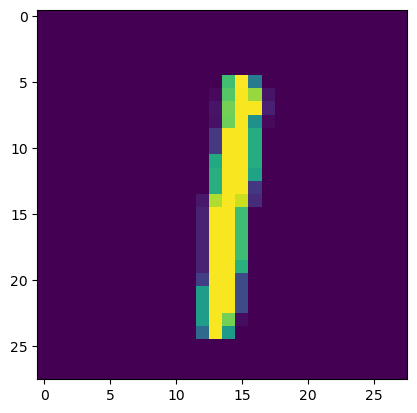

1


In [8]:
# display the image 

plt.imshow(X_train[40])
plt.show()

print(Y_train[40])

In [10]:
print(np.unique(Y_train))

# Y labels only contains 0-9

[0 1 2 3 4 5 6 7 8 9]


In [ ]:
# We can use these labels as such or we can also apply "One-Hot Encoding"

In [11]:
# Normalization 
# for better prediction 
# Scaling the values, normalizing the values from 0-255 to 0-1  

X_train = X_train / 255 
X_test = X_test / 255 

### Building Neural Network 

In [13]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)), # Flatten the matrix 28X28 into 1D array
    keras.layers.Dense(50, activation='relu'), # 50 neurons 
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid') # Output layer must be 10, because of the target/label (y)
])

In [14]:
# Compiling 
model.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy', # For multiple labels/targets, use: categorical_crossentropy for binary labels
    metrics=['accuracy']
    )

In [15]:
# Training the NN

model.fit(X_train, Y_train, epochs=10) # epochs: how many times the NN should go through the data

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2950 - accuracy: 0.9147
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1357 - accuracy: 0.9596
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1002 - accuracy: 0.9697
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0817 - accuracy: 0.9751
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0666 - accuracy: 0.9798
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0587 - accuracy: 0.9815
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0500 - accuracy: 0.9839
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0434 - accuracy: 0.9862
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0387 - accuracy: 0.9882
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.033

In [ ]:
# The training data acurracy = 98.9%


### Accuracy on Test Data:

In [16]:
loss, accuracy = model.evaluate(X_test, Y_test)

print(loss, accuracy)

313/313 [==============================] - 1s 1ms/step - loss: 0.1033 - accuracy: 0.9730
0.10325854271650314 0.9729999899864197


In [ ]:
# The test data acurracy = 97.2%

In [17]:
# Predictions on Test_data 

Y_pred = model.predict(X_test)

313/313 [==============================] - 1s 1ms/step


In [18]:
print(Y_pred.shape)

(10000, 10)


In [19]:
print(Y_pred[0])

[6.15272496e-04 1.95214280e-03 5.48866354e-02 8.61687899e-01
 2.43377758e-06 5.14441272e-05 1.41282905e-08 9.99998808e-01
 6.77899783e-03 4.63067830e-01]


In [ ]:
# We clearly see that, for each image, the NN predicts the distance percentage to each 10 target/labels. 
# So therefore, the highest one becomes the chosen one. 

# It answers the question: What is the probability that the label is 0-9

In [21]:
# Converting the prediction probabilities to class label - FIRST IMAGE 

label_for_first_image = np.argmax(Y_pred[0]) # returns the index 

print(label_for_first_image)

7


In [ ]:
# Converting the prediction probabilities to class label - ALL 

In [22]:
Y_pred_labels = [np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 2, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 9, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 2, 9, 8, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 5, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 2, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

In [ ]:
# Y_test ==> True labels 
# Y_pred_labels ==> Predicted labels by NN

In [23]:
# Lets compare the NN predictions by the Y_test 

conf_mat = confusion_matrix(Y_test, Y_pred_labels)
print(conf_mat)

tf.Tensor(
[[ 968    0    0    1    0    2    4    1    4    0]
 [   0 1121    3    3    0    0    2    1    5    0]
 [   3    4 1001    3    1    2    0    9    9    0]
 [   0    0    3  987    0    5    0    5    7    3]
 [   0    1   11    1  945    0    4    2    2   16]
 [   2    0    1   12    1  862    2    2    7    3]
 [   4    2    3    1    5    4  934    0    5    0]
 [   0    1   19    1    0    0    0  996    2    9]
 [   2    0    4    9    6    7    2    3  935    6]
 [   0    2    0    4    8    4    1    7    3  980]], shape=(10, 10), dtype=int32)


Text(0.5, 47.7222222222222, 'Predicted Labels')

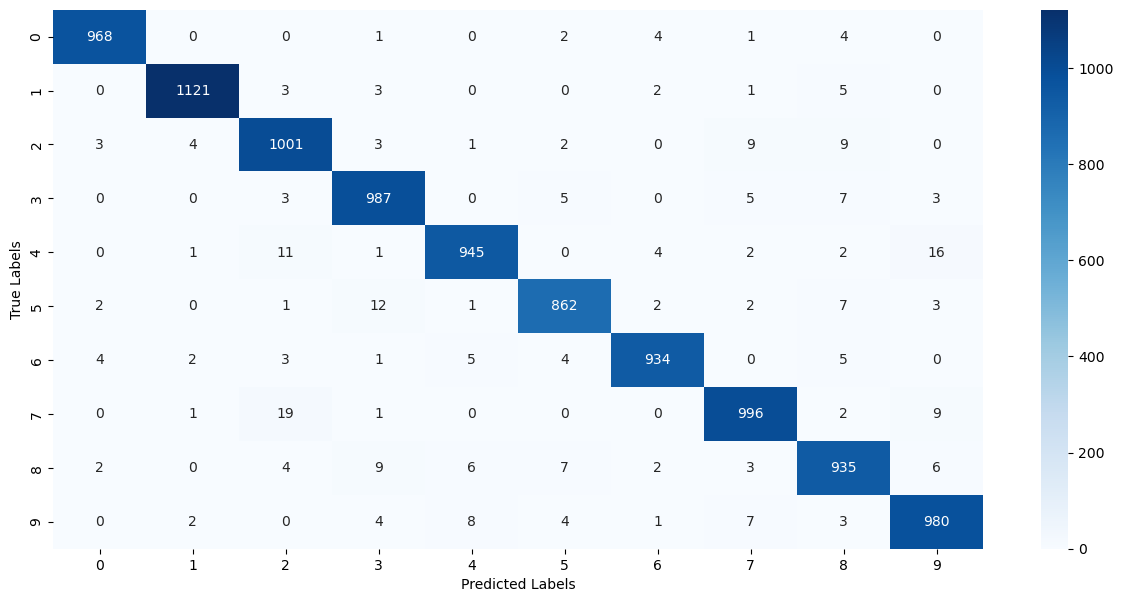

In [24]:
# Heatmap to compare correlation 

plt.figure(figsize=(15,7))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.ylabel("True Labels")
plt.xlabel("Predicted Labels")

In [27]:
# This means that 

# 0 was correctly predicted 968 times 
# 1 was correctly predicted 1121 times 
# 2 was correctly predicted 1001 times 
# 3 was correctly predicted 987 times 
# 4 was correctly predicted 945 times 
# 5 was correctly predicted 862 times 
# 6 was correctly predicted 934 times 
# 7 was correctly predicted 996 times 
# 8 was correctly predicted 935 times 
# 9 was correctly predicted 980 times 

### Build a predictive system 

In [34]:
# load the image 
file = '6.jpg'

# Process the image 
image = cv2.imread(file)

In [38]:
type(image)

numpy.ndarray

In [40]:
print(image.shape)

(4032, 3024, 3)


In [46]:
# Convert the rgb image to grayscale 

grayscale = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

In [48]:
grayscale.shape

(4032, 3024)

In [49]:
# Resize the image to fit 28x28 which our NN Flatten layer accepts 

img = cv2.resize(grayscale, (28,28))

In [50]:
img.shape

(28, 28)

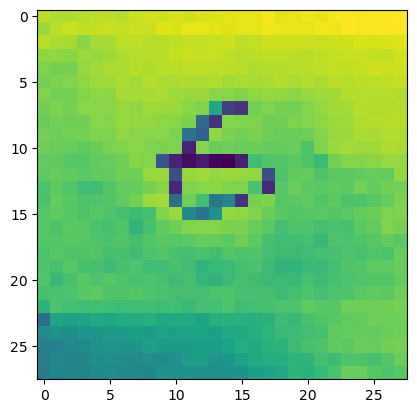

In [52]:
plt.imshow(img)
plt.show()

In [53]:
img_ = img / 255
print(img_)

[[0.87058824 0.85098039 0.85098039 0.8627451  0.8745098  0.8745098
  0.8627451  0.89019608 0.90588235 0.90196078 0.90980392 0.90196078
  0.91764706 0.91764706 0.92941176 0.93333333 0.9372549  0.95686275
  0.92941176 0.93333333 0.94901961 0.94117647 0.95686275 0.96078431
  0.95686275 0.96078431 0.96078431 0.96862745]
 [0.82745098 0.87058824 0.89019608 0.87843137 0.88235294 0.89411765
  0.88235294 0.89803922 0.89411765 0.9254902  0.91372549 0.9372549
  0.9372549  0.92941176 0.9254902  0.9372549  0.9372549  0.94509804
  0.94117647 0.94117647 0.9372549  0.95294118 0.94509804 0.96470588
  0.96078431 0.96470588 0.96470588 0.96470588]
 [0.86666667 0.84705882 0.84313725 0.79607843 0.83921569 0.84313725
  0.8745098  0.8745098  0.86666667 0.87058824 0.87843137 0.88627451
  0.88627451 0.89019608 0.90196078 0.8745098  0.88235294 0.90196078
  0.90196078 0.89803922 0.89803922 0.89411765 0.90196078 0.90196078
  0.91372549 0.90980392 0.91372549 0.92156863]
 [0.80784314 0.81568627 0.80392157 0.82745098

In [54]:
type(img_)

numpy.ndarray

In [55]:
img_reshaped = np.reshape(img_, [1,28,28]) # Inform the model, we're predicting for only 1-image

In [56]:
prediction = model.predict(img_reshaped)

print(prediction)

1/1 [==============================] - 0s 22ms/step
[[2.8527424e-07 3.2136757e-08 1.0000000e+00 1.5219779e-06 4.1267385e-24
  9.5509267e-01 8.2345140e-01 8.8243264e-13 9.9999982e-01 2.1037903e-14]]


In [57]:
print(np.argmax(prediction))

2


# PREDICTIVE SYSTEM

Enter Image path (Image must be a handwritten figure 0-9)6.jpg


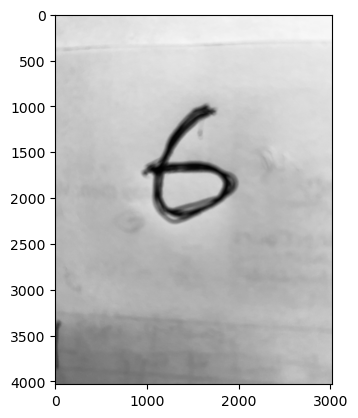

1/1 [==============================] - 0s 21ms/step
Your Hand-written Image is: 2


In [58]:
file_path = input('Enter Image path (Image must be a handwritten figure 0-9)')

image = cv2.imread(file_path)

plt.imshow(image)
plt.show()

grayscale = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

img = cv2.resize(grayscale, (28,28))

img_ = img / 255

img_reshaped = np.reshape(img_, [1,28,28])

prediction = model.predict(img_reshaped)

print("Your Hand-written Image is:", np.argmax(prediction))